## Week 5 Assignment - Midterm
### Race as Vulnerability: The Relationship between Policing and Gentrification
#### John Parks, Joshua Claxton and Miles Cressy

The aim for this midterm is to demonstrate our progress in assessing the relationship between poli

Import various packages for data manipulation/cleaning and visualization.

In [1]:
# standard data manipulation
import pandas as pd

# geospatial data manipulation/visualization
import geopandas as gpd
import plotly.express as px

# advanced graph visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Assessing Gentrification

Before we delve into policing data, we'll attempt to define gentrification through a layering of various metrics related to housing and demographic data in the greater Los Angeles Area and their potential shifts over time. We will primarily build this foundation of gentrification through the lens of rent burden and shifts in rent prices, changes in renter-occupied household demographics, and concentration of building permit data. The potential metrics that could be utilized are various and expansive, and as our team approaches the final project, our selection of variables will organically shift and adapt as we develop a deeper understanding of gentrification.

#### Demographic Shifts in Renter-occupied Households

In [14]:
def categorise_race_tracts(row):  
    if row['black_alone'] > row['white_alone'] and row['black_alone'] > row['hispanic'] and row['black_alone'] > row['other'] and row['black_alone'] > row['asian_alone']:
        return 'Black'
    elif row['hispanic'] > row['white_alone'] and row['hispanic'] > row['black_alone'] and row['hispanic'] > row['other'] and row['hispanic'] > row['asian_alone']:
        return 'Hispanic'
    elif row['white_alone'] > row['hispanic'] and row['white_alone'] > row['black_alone'] and row['white_alone'] > row['other'] and row['white_alone'] > row['asian_alone']:
        return 'White'
    elif row['asian_alone'] > row['hispanic'] and row['asian_alone'] > row['black_alone'] and row['asian_alone'] > row['other'] and row['black_alone'] > row['white_alone']:
        return 'Asian'
    return 'Other'

# iterate on dataframe and create new column by applying created race function
df_rent_burden['majority_race'] = df_rent_burden.apply(lambda row: categorise_race_tracts(row), axis=1)
# assess results
df_rent_burden.value_counts('majority_race')

majority_race
Hispanic    1145
White       1008
Other        212
Black        119
Asian         14
dtype: int64

#### Rent Burden and Rent Price Shifts

Rent burden is defined broadly by the percentage of renter-occupied households who pay 30% or more of household income toward rent. This indicator will help inform the degree to which particular households are able to absorb forces of gentrification and which are susceptible. Minor cleaning was done prior to bringing in this data.

In [2]:
# import rent burden csv file
df_rent_burden = pd.read_csv('data/rent_burden_ct_1.csv', dtype = {'Geo_FIPS':str})
# fips column does not have a leading zero, let's add that here
df_rent_burden['Geo_FIPS'] = df_rent_burden['Geo_FIPS'].str.zfill(11)
# inspect rent burden data frame
df_rent_burden.head()

,Geo_FIPS,total_housing_units,white_alone,black_alone,american_indian_alone,asian_alone,native_hawaiian_alone,other,two_or_more,white_alone_not_hisp,hispanic,total_pop,rent_burden
0,06037101110,644,438,0,0,58,0,52,96,372,207,3879,0.549689
1,06037101122,344,287,0,0,0,0,33,24,287,33,4247,0.706395
2,06037101220,762,450,8,16,48,0,110,130,394,285,3583,0.535433
3,06037101221,1140,815,68,0,25,0,178,54,747,269,3723,0.663158
4,06037101222,816,715,17,0,28,17,28,11,515,239,2690,0.651961


<AxesSubplot: xlabel='rent_burden'>

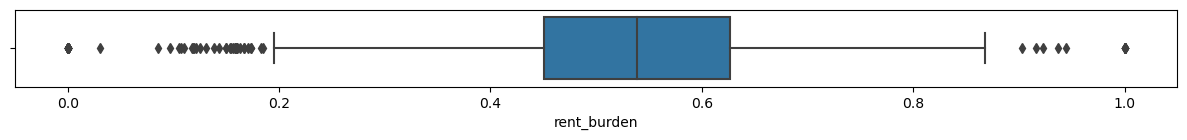

In [3]:
fig, ax = plt.subplots(1, 3, figsize = (15, 1))
sns.boxplot(df_rent_burden, x='rent_burden')

In [15]:
df_rent_burden_white = df_rent_burden[df_rent_burden.majority_race == 'White']
df_rent_burden_black = df_rent_burden[df_rent_burden.majority_race == 'Black']
df_rent_burden_hispanic = df_rent_burden[df_rent_burden.majority_race == 'Hispanic']

Text(0.27, 1410, 'Correlation Coefficient: .26')

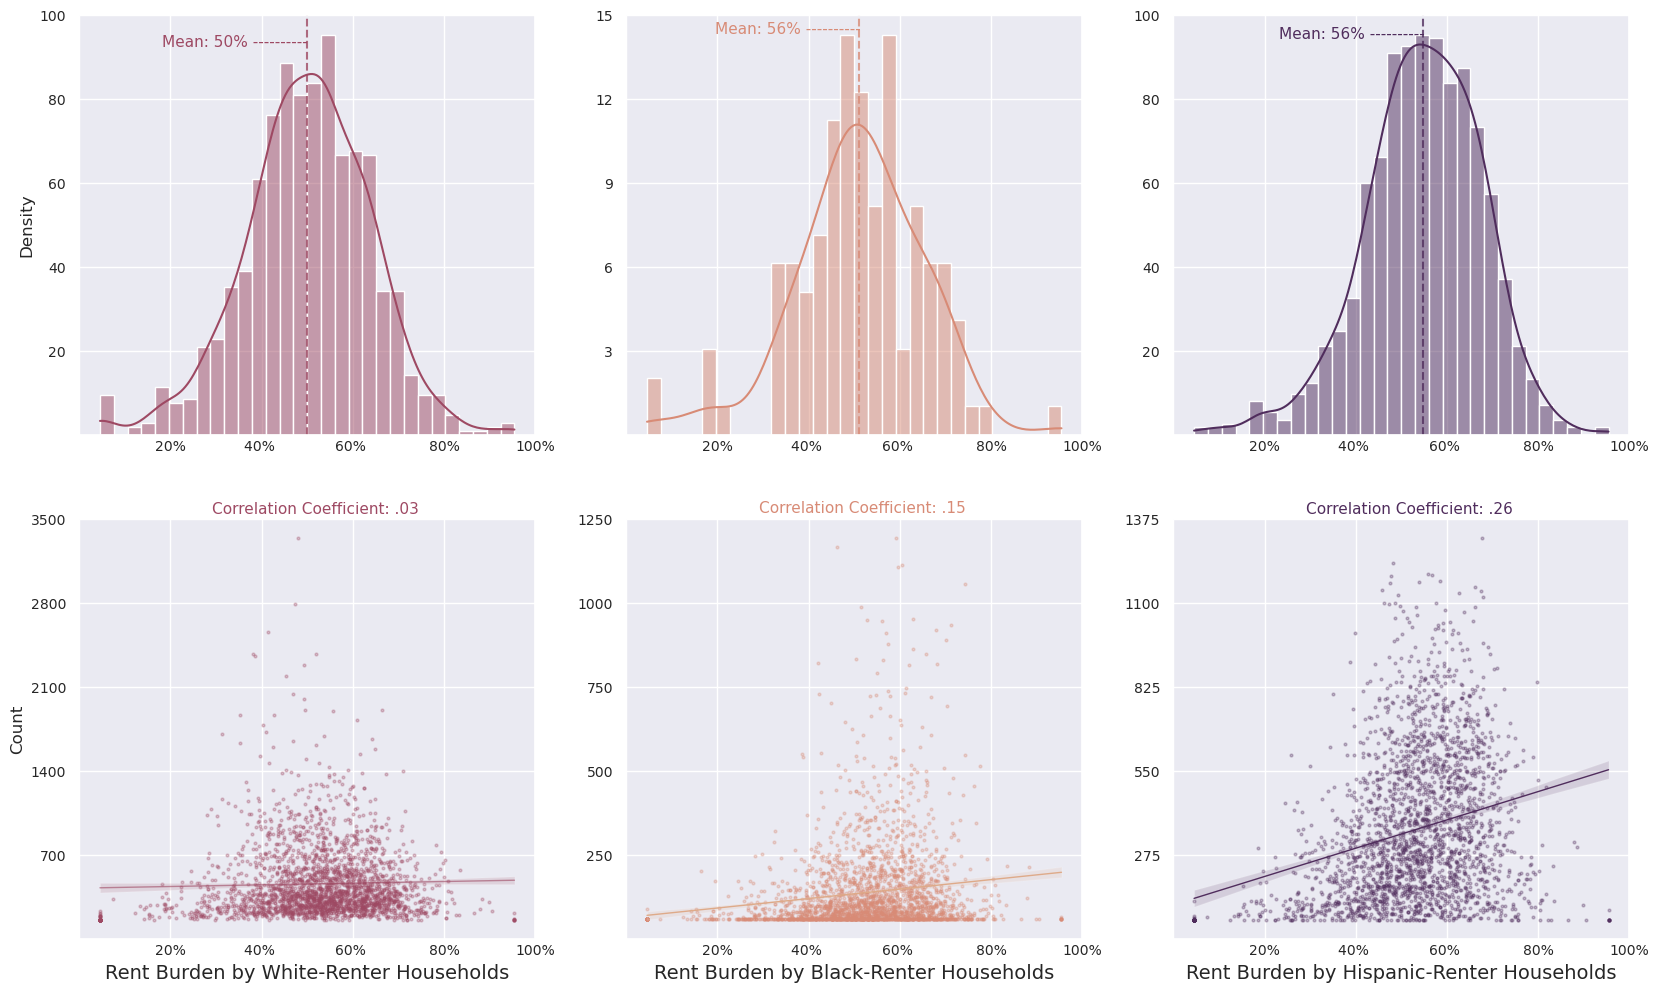

In [162]:
#lets take a look at the correlation between the race of renter-occupied households and the percentages of rent burden for the census tract

# set subplots
fig, axes = plt.subplots(2, 3, figsize = (20, 12))

# set visual style
sns.set(style="darkgrid")

# create histogram plots
histplot_white = sns.histplot(ax = axes[0,0], data=df_rent_burden_white, x='rent_burden', alpha = .5, bins =30, color = [158/255,73/255,99/255], kde = True)
histplot_black = sns.histplot(ax = axes[0,1], data=df_rent_burden_black, x='rent_burden', alpha = .5, bins =30, color = [216/255,139/255,118/255],kde = True)
histplot_hispanic = sns.histplot(ax = axes[0,2], data=df_rent_burden_hispanic, x='rent_burden', alpha = .5, bins =30, color = [80/255,45/255,93/255], kde = True)

# create regression plots
scatter_white = sns.regplot(ax = axes[1,0], data=df_rent_burden, x= 'rent_burden', y= 'white_alone', scatter_kws={"color": [158/255,73/255,99/255], "s": 4, "alpha" : .3 }, line_kws={'linewidth':1,'alpha':.6, "color": [158/255,73/255,99/255]})
scatter_black = sns.regplot(ax = axes[1,1], data=df_rent_burden, x= 'rent_burden', y= 'black_alone', scatter_kws={"color": [216/255,139/255,118/255], "s": 4, "alpha" : .3}, line_kws={'linewidth':1,'alpha':1, "color": [222/255,170/255,137/255]})
scatter_hispanic = sns.regplot(ax = axes[1,2], data=df_rent_burden, x= 'rent_burden', y= 'hispanic', scatter_kws={"color": [80/255,45/255,93/255], "s": 4, "alpha" : .3}, line_kws={'linewidth':1,'alpha':1, "color": [80/255,45/255,93/255]})

# change x-axis and y-axis labels
axes[1,0].set_xlabel('Rent Burden by White-Renter Households', fontsize = 14)
axes[1,1].set_xlabel('Rent Burden by Black-Renter Households', fontsize = 14)
axes[1,2].set_xlabel('Rent Burden by Hispanic-Renter Households', fontsize = 14)

axes[1,0].set_ylabel('Count')
axes[1,1].set_ylabel(' ')
axes[1,2].set_ylabel(' ')

axes[0,0].set(xlabel=' ', ylabel = 'Density')
axes[0,1].set(xlabel=' ', ylabel = ' ')
axes[0,2].set(xlabel=' ', ylabel = ' ')

#align x-axis and y-axis grid lines for histogram plots
histplot_white.xaxis.set_major_locator(LinearLocator(6))
histplot_black.xaxis.set_major_locator(LinearLocator(6)) 
histplot_hispanic.xaxis.set_major_locator(LinearLocator(6)) 
histplot_white.yaxis.set_major_locator(LinearLocator(6))
histplot_black.yaxis.set_major_locator(LinearLocator(6)) 
histplot_hispanic.yaxis.set_major_locator(LinearLocator(6))

#align x-axis and y-axis grid lines for scatter plots
scatter_white.xaxis.set_major_locator(LinearLocator(6))
scatter_black.xaxis.set_major_locator(LinearLocator(6)) 
scatter_hispanic.xaxis.set_major_locator(LinearLocator(6)) 
scatter_white.yaxis.set_major_locator(LinearLocator(6))
scatter_black.yaxis.set_major_locator(LinearLocator(6)) 
scatter_hispanic.yaxis.set_major_locator(LinearLocator(6))

# change x-axis and y-axis tick labels for histogram plots
histplot_white.set_xticklabels(labels = [' ', '20%', '40% ', '60% ', '80%', '100%'], fontsize = 10, y=.02)
histplot_black.set_xticklabels(labels = [' ', '20%', '40% ', '60% ', '80%', '100%'], fontsize = 10, y=.02)
histplot_hispanic.set_xticklabels(labels = [' ', '20%', '40% ', '60% ', '80%', '100%'], fontsize = 10, y=.02)
scatter_white.set_xticklabels(labels = [' ', '20%', '40% ', '60% ', '80%', '100%'], fontsize = 10, y=.02)
scatter_black.set_xticklabels(labels = [' ', '20%', '40% ', '60% ', '80%', '100%'], fontsize = 10, y=.02)
scatter_hispanic.set_xticklabels(labels = [' ', '20%', '40% ', '60% ', '80%', '100%'], fontsize = 10, y=.02)

histplot_white.set_yticklabels(labels = [' ', '20', '40', '60', '80', '100'], fontsize = 10, y=.02)
histplot_black.set_yticklabels(labels = [' ', '3', '6', '9', '12', '15'], fontsize = 10, y=.02)
histplot_hispanic.set_yticklabels(labels = [' ', '20', '40', '60', '80', '100'], fontsize = 10, y=.02)
scatter_white.set_yticklabels(labels = [' ', '700', '1400', '2100', '2800', '3500'], fontsize = 10, y=.02)
scatter_black.set_yticklabels(labels = [' ', '250', '500', '750', '1000', '1250'], fontsize = 10, y=.02)
scatter_hispanic.set_yticklabels(labels = [' ', '275', '550', '825', '1100', '1375'], fontsize = 10, y=.02)

# add mean vertical line and text for histogram plots
histplot_white.axvline(x = df_rent_burden_white.rent_burden.mean(), linewidth = 2, alpha = .8, ls = '--', lw = 1.5, color = [158/255,73/255,99/255])
histplot_white.text(x = df_rent_burden_white.rent_burden.mean() - .35,
        y = 97, 
        s = 'Mean: 50% ---------- ', 
        color = [158/255,73/255,99/255],
        weight = 'normal', 
        fontsize = 11)


histplot_black.axvline(x = df_rent_burden_black.rent_burden.mean(), linewidth = 2, alpha = .8, ls = '--', lw = 1.5, color = [216/255,139/255,118/255])
histplot_black.text(x = df_rent_burden_black.rent_burden.mean() - .31,
        y = 14.05, 
        s = 'Mean: 56% ---------- ', 
        color = [216/255,139/255,118/255],
        weight = 'normal', 
        fontsize = 11)

histplot_hispanic.axvline(x = df_rent_burden_hispanic.rent_burden.mean(), linewidth = 2, alpha = .8, ls = '--', lw = 1.5, color = [80/255,45/255,93/255])
histplot_hispanic.text(x = df_rent_burden_hispanic.rent_burden.mean() - .28,
        y = 107, 
        s = 'Mean: 56% ---------- ', 
        color = [80/255,45/255,93/255],
        weight = 'normal', 
        fontsize = 11)

# add correlation coefficent values
scatter_white.text(x = .27,
        y = 3700, 
        s = 'Correlation Coefficient: .03', 
        color = [158/255,73/255,99/255],
        weight = 'normal', 
        fontsize = 11)

scatter_black.text(x = .27,
        y = 1300, 
        s = 'Correlation Coefficient: .15', 
        color = [216/255,139/255,118/255],
        weight = 'normal', 
        fontsize = 11)

scatter_hispanic.text(x = .27,
        y = 1410, 
        s = 'Correlation Coefficient: .26', 
        color = [80/255,45/255,93/255],
        weight = 'normal', 
        fontsize = 11)